In [1]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
Categories=['Nangka','Pepaya']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='C:\\Users\\user\\Downloads\\Dataset_daun\\Dataset_daun' 
#path which contains all the categories of images
for i in Categories:
      
    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)

loading... category : Nangka
loaded category:Nangka successfully
loading... category : Pepaya
loaded category:Pepaya successfully


In [3]:
#dataframe
df=pd.DataFrame(flat_data) 
df['Target']=target
df.shape

(340, 67501)

In [4]:
#input data 
x=df.iloc[:,:-1] 
#output data
y=df.iloc[:,-1]

In [5]:
# Splitting the data into training and testing sets
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=77,stratify=y)

In [6]:
# Defining the parameters grid for GridSearchCV
param_grid={'C':[0.1,1,10,100],
            'gamma':[0.0001,0.001,0.1,1],
            'kernel':['rbf','poly']}
  
# Creating a support vector classifier
svc=svm.SVC(probability=True)
  
# Creating a model using GridSearchCV with the parameters grid
model=GridSearchCV(svc,param_grid)

# Training the model using the training data

In [7]:
model.fit(x_train,y_train)

GridSearchCV(estimator=SVC(probability=True),
             param_grid={'C': [0.1, 1, 10, 100],
                         'gamma': [0.0001, 0.001, 0.1, 1],
                         'kernel': ['rbf', 'poly']})

In [8]:
# Testing the model using the testing data
y_pred = model.predict(x_test)
  
# Calculating the accuracy of the model
accuracy = accuracy_score(y_pred, y_test)
  
# Print the accuracy of the model
print(f"The model is {accuracy*100}% accurate")

The model is 98.52941176470588% accurate


In [9]:
print(classification_report(y_test, y_pred, target_names=['Nangka', 'Pepaya']))

              precision    recall  f1-score   support

      Nangka       0.97      1.00      0.99        34
      Pepaya       1.00      0.97      0.99        34

    accuracy                           0.99        68
   macro avg       0.99      0.99      0.99        68
weighted avg       0.99      0.99      0.99        68



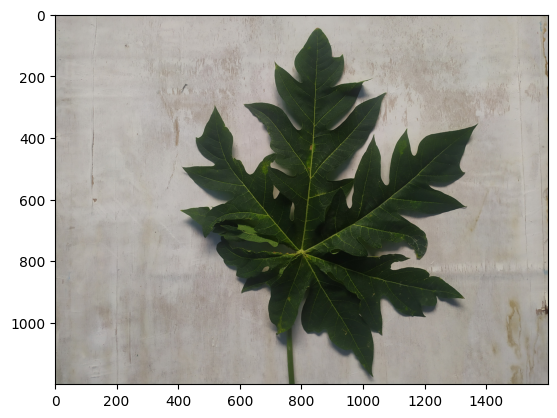

Nangka = 2.6932622429740567%
Pepaya = 97.30673775702594%
The predicted image is : Pepaya


In [10]:
path = 'C:\\Users\\user\\Downloads\\Dataset_daun\\Dataset_daun\\Pepaya\\001.jpg'
img = imread(path)
plt.imshow(img)
plt.show()
img_resize=resize(img, (150,150,3))
l = [img_resize.flatten()]
probability=model.predict_proba(l)
for ind, val in enumerate(Categories):
    print(f'{val} = {probability[0] [ind]*100}%')
print("The predicted image is : "+Categories[model.predict(l)[0]])